In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math

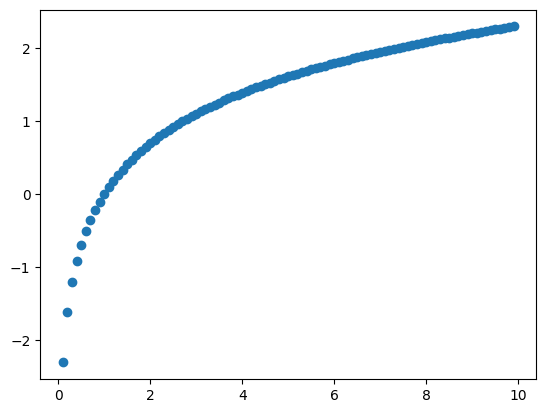

In [29]:
X = np.arange(0.1,10,0.1)
Y = np.log(X)

plt.scatter(X,Y)

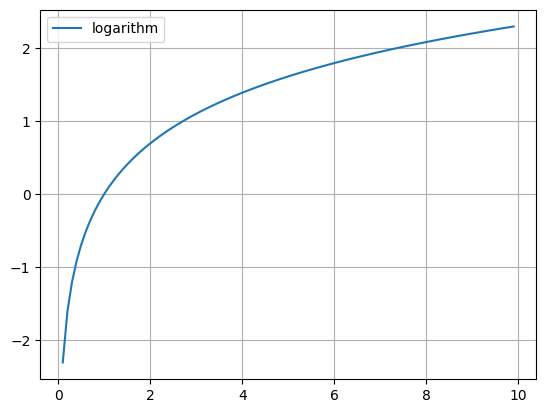

In [30]:
plt.plot(X,Y,label='logarithm')
plt.grid()
plt.legend()

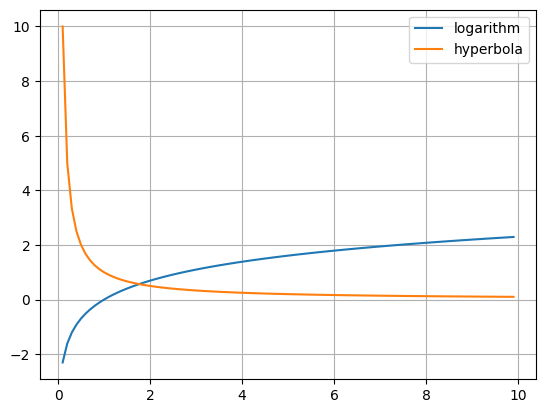

In [31]:
Hyper = 1.0/X

plt.plot(X,Y,label='logarithm')
plt.plot(X,Hyper,label='hyperbola')
plt.grid()
plt.legend()

## Производная функция

# $f^{\prime}(x) = \lim\limits_{\Delta x\to 0 } \frac{f(x+\Delta x) - f(x)}{\Delta x} = \lim\limits_{\Delta x\to 0 } \frac{\Delta f}{\Delta x}$

In [36]:
def derivative(X,Y):
    Y_prime = np.ones(X.shape)
    # или Y_prime = np.ones_like(X)
    
    for i in range(len(X)-1):
        Y_prime[i] = (Y[i+1]-Y[i])/(X[i+1]-X[i])


    return Y_prime

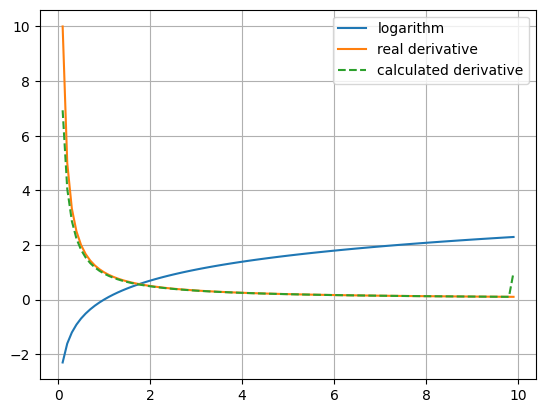

In [37]:
Y_prime = derivative(X, Y)

plt.plot(X,Y,label='logarithm')
plt.plot(X,Hyper,label='real derivative')
plt.plot(X,Y_prime, '--', label='calculated derivative', )
plt.grid()
plt.legend()

In [38]:
# ой, такого тут быть не должно...
Y_prime[-1]

np.float64(1.0)

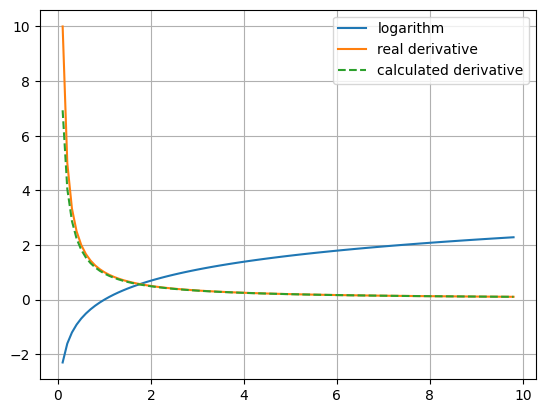

In [39]:
plt.plot(X[:-1],Y[:-1],label='logarithm')
plt.plot(X[:-1],Hyper[:-1],label='real derivative')
plt.plot(X[:-1],Y_prime[:-1], '--', label='calculated derivative', )
plt.grid()
plt.legend()

## Оценим на сколько наш метод нахождения производной отклоняется от истины

In [44]:
def MSE(Target, Output):
    Error = Target-Output
    Error = Error**2
    return np.mean(Error)

In [45]:
MSE(Hyper[:-1], Y_prime[:-1])

np.float64(0.10880549990987241)

## А что если $\Delta x$ станет меньше?

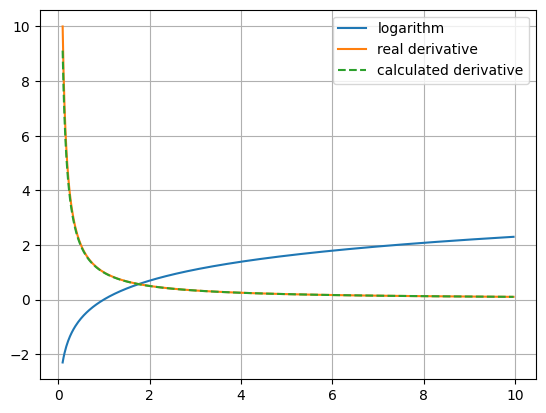

In [46]:
X = np.arange(0.1,10,0.02)
Y = np.log(X)
Hyper = 1.0/X
Y_prime = derivative(X,Y)

plt.plot(X[:-1],Y[:-1],label='logarithm')
plt.plot(X[:-1],Hyper[:-1],label='real derivative')
plt.plot(X[:-1],Y_prime[:-1], '--', label='calculated derivative', )
plt.grid()
plt.legend()

In [47]:
MSE(Hyper[:-1], Y_prime[:-1])

np.float64(0.0036876038343595955)

## Автоматизируем рутинные процессы

In [54]:
def draw_results(X, Y, Target, Output, drop_last=True):
    if drop_last:
        plt.plot(X[:-1],Y[:-1],label='logarithm')
        plt.plot(X[:-1],Target[:-1],label='real derivative')
        plt.plot(X[:-1],Output[:-1], '--', label='calculated derivative', )
        plt.grid()
        plt.legend()
        plt.show()
    else:
        plt.plot(X[:-1],Y[:-1],label='logarithm')
        plt.plot(X[:-1],Target[:-1],label='real derivative')
        plt.plot(X[:-1],Output, '--', label='calculated derivative', )
        plt.grid()
        plt.legend()
        plt.show()

## А что на счет других функций?

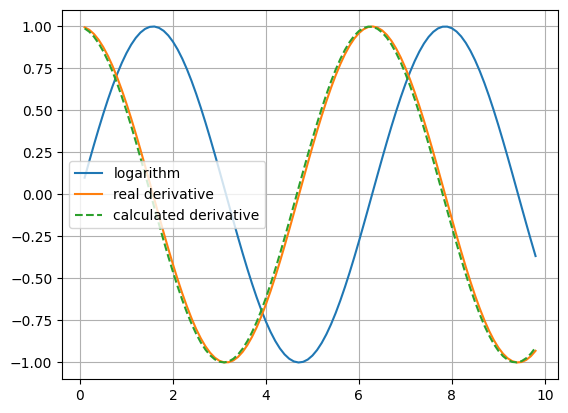

In [55]:
X = np.arange(0.1,10,0.1)
Y = np.sin(X)
TrueDerivative = np.cos(X)
Y_prime = derivative(X,Y)

draw_results(X,Y,TrueDerivative,Y_prime)

In [56]:
MSE(TrueDerivative, Y_prime)

np.float64(0.0372479404312957)

## Альтернативное решение

In [57]:
def faster_derivative(X,Y):
    return (Y[1:]-Y[:-1])/(X[1:]-X[:-1])

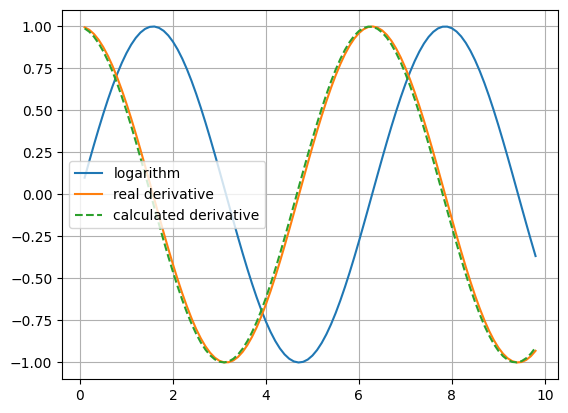

In [60]:
# проверка работоспосбности новой функции
Y_prime = faster_derivative(X,Y)
draw_results(X,Y,TrueDerivative,Y_prime,drop_last=False)

In [61]:
from time import time

start = time()
Y_prime = derivative(X,Y)
print(f"время работы с циклом for: {time()-start}")

start = time()
Y_prime = faster_derivative(X,Y)
print(f"время работы без цикла for: {time()-start}")

время работы с циклом for: 0.0006470680236816406
время работы без цикла for: 0.00018405914306640625


# Лабораторная работа 1
## 1. Реализвать функцию для вычисления определенного интеграла функции заданной множеством точек (x,y)
## 2. Отобразить графики начальной функции, истинного интеграла и вычисленного интеграла (по аналогии с примером выше)
## 3. Вычислить среднюю ошибку найденных значений интеграла

### примечание: работа с массивами должна быть произведена при помощи модуля numpy, вывод графиков при помощи модуля matplotlib

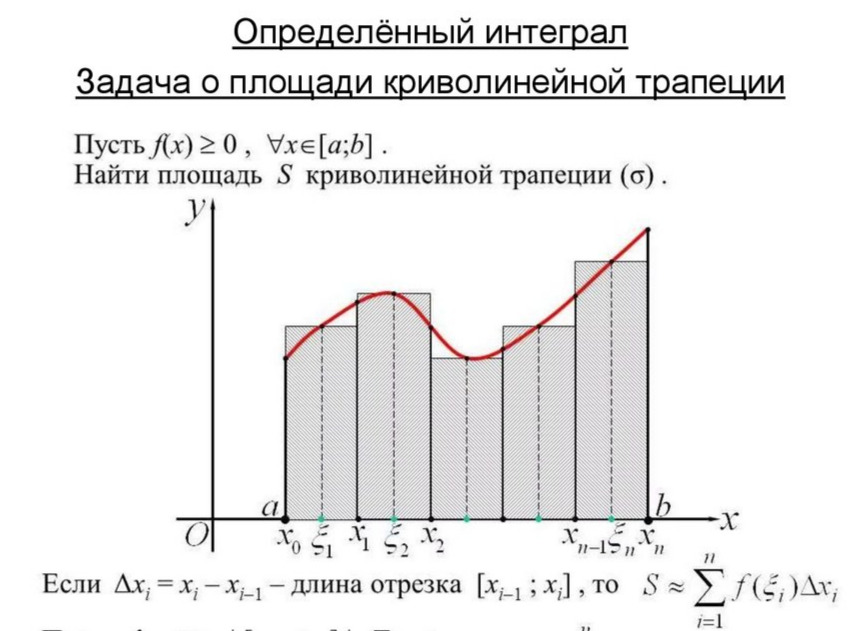